<div style="border:solid green 2px; padding: 20px">
<b>Привет, Елизавета!</b>

Меня зовут Марина К, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай мне знать, и мы перейдем на «вы». 

Ты проделала большую работу над проектом, но давай сделаем его еще лучше! Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления.  </div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Так я выделяю все остальные комментарии, твои удачные решения, комментарии по твоим промежуточным выводам и даю подсказки, как можно улучшить твоё решение.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)

# Определяющие успешность игры закономерности

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> Отличное начало! Ты кратко описала контекст задачи. Было бы здорово еще добавить описание входных переменных и план проекта. Так, читателю твоего проекта будет легче погрузиться в задачу. Более подробно про оформление проектов можно почитать в студенческом ноушне. Если будут проблемы с доступом в ноушн, можно обратиться к куратору.  </div>

<div class="alert alert-info"> <b>Комментарии студента:</b> А планом проекта разве не является содержание, которое создается автоматически?</div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2:</b> Верно, в проекте можно создать содержание автоматически. А если ты будешь где-то выкладывать проект, то можно потренироваться делать план работы со ссылками. </div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings 
from scipy import stats as st
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/games.csv')
display(df.head(10))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Молодец, что используешь display для вывода таблиц.  </div>

Рассмотрим полученную информацию более подробно:

Таблица содержит 11 столбцов, в которых встречаются данные типа float64 и object:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

**Вывод:**

В таблице много пропусков, природа которых пока не совсем ясна: пропуск может означать, что информация отсутствует, или что просто, допустим, то же возрастное ограничение отсутствует, поэтому и обозначается NaNом. Для установления закономерности наибоьшее внимание обратим на стобцы *genre* и на оценки от критиков и пользователей. 

## Предобработка данных

Сперва изменим регистр в названии столбцов:

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Ты привела описание столбцов - хорошо. Это можно также делать и во введении.   </div>

In [2]:
df.columns = map(str.lower, df.columns)

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера: </b>

Здесь можно еще вот так:
    
df.columns = df.columns.str.lower()
</div>

Проверим наличие пропусков:

In [3]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-block alert-success">
<b>Комментарии ревьюера: </b>

Будет правильно еще привести долю пропусков относительно общего числа строк. Так мы поймем много их или мало. 
</div>

Таблица содержит давольно много пропусков, которые стоит обработать:

* name - так как всего две игры не имеют названия, избавимся от этих строк, их вклад в ощий анализ незначителен
* year_of_release - избавимся от пропусков, потому что в дальнейшем надо будет изменить тип этого столбца, а пропуски не позволят это сделать, более того доля пропусков незначительна. 
* genre - опять две игры, может это даже те же, что и без названия, избавляемся от них
* user_score и critic_score - столбцы очень значимы, их нельзя просто заменить среднем или медианой, потому что пропусков очень много, да и оценки все субъективны, однако их тип потом надо будет менять, а с NaN это не получится, поэтому заполним пропуски -1, а при анализе будем прописывать условие, игнорирующие -1. Также есть аббревиатура tbd - от английского To Be Determined (будет определено) используется, если какая-то информация еще не определена, по сути тотже NaN, поэтому заменим его на -1. Такая замена выбрана, чтоб не упустить реальные нулевые оценки. 
* rating - заполним значением "Unknown", потому что природа пропусков не известна

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>Согласна во всеми пунктами, кроме последнего. Мы не можем точно сказать, по какой причине пропущен рейтинг и означает ли это, что ограничения нет. Заполнять значением Е будет некорректно. Более того, если изучить пропуски более подробно, то можно заметить, что оценки и рейтинг часто отсутствуют вместе. Значит информация не была внесена. А это уже не случайные пропуски, и, любое заполнение каким-то конкретным значением приведет к искажению информации.

Пропуски в рейтинге нам нужно заполнить значением-заглушкой ( Unknown, Undefinded  и тд). Поправь, пожалуйста. И после того, как сделаешь этот пункт, посмотри, как изменится портрет пользователя из Японии. </s>
    
Done!    
    </div>

In [4]:
drop_columns = ['name', 
                'year_of_release', 
                'genre']

for i in drop_columns:
    df = df.dropna(subset = [i])

minus_one_columns = ['user_score', 
                     'critic_score']

for i in minus_one_columns:
    df[i] = df[i].fillna(-1)
    
df['user_score'] = df['user_score'].replace('tbd', -1)
    
df['rating'] = df['rating'].fillna('Unknown')

Теперь обратим внимание на тип данных в столбцах: 

* year_of_release - представлен в типе float64, хотя год всегда представляется в целочисленным типом
* critic_score - не содержит в себе ни одной дробной оценки (проверенно методом *unique*), значит следует перевести в int
* user_score - представляет собой дробную оценку (проверенно методом *unique*), однако она передана строчным типом, следовательно необходимо изменить тип на float64

In [5]:
df = df.astype({"year_of_release": "int64",
                "critic_score": "int64", 
                "user_score": "float64"})

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Отлично! </div>

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец *total_sale*, но перед этим округлим продажи до двух знаков после запятой, потому что остальные значения уже не несут особой смысловой нагрузки

In [6]:
df['total_sale'] = 0
rounded_columns = ['na_sales', 
                   'eu_sales', 
                   'jp_sales', 
                   'other_sales']

for i in rounded_columns:
    df[i] = np.round(df[i], 2)
    df['total_sale'] += df[i]

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Вот так df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) будет тоже верно.  </div>

Проверим таблицу на наличие дубликатов:

In [7]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

Еще раз выведем информацию о таблице, чтоб удостовериться в правильности проведенной предобработки. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
total_sale         16444 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


**Вывод:**

Таблица содержала большое количество пропусков: какие то из них были критичны, какие то нет, в любом случае по итогу предобработки данные готовы к анализу.

## Исследовательский анализ данных

### Вычисление количества игр в год

Посмотрим, сколько игр выпускалось в разные годы. 

Для этого достаточно применить метод *value_counts()*, который выдаст количество встречаний уникальных элементов, что и будет эквивалентно количеству игр в разные года.  

In [9]:
years_values = df['year_of_release'].value_counts().sort_values()
years_values

1980       9
1985      14
1984      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: int64

Визуализируем данные. 

Text(0.5, 1.0, 'amout per year')

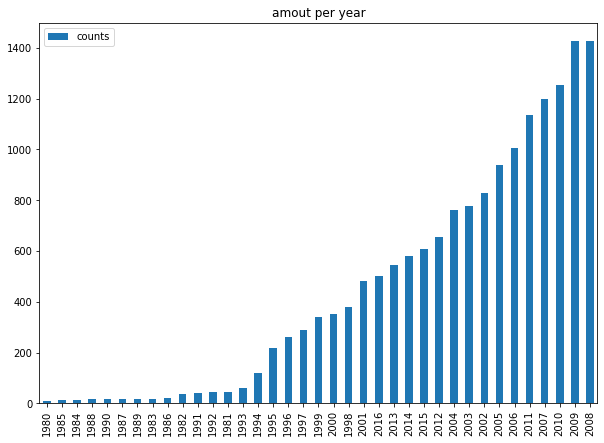

In [10]:
df_years_values = pd.DataFrame(years_values)
df_years_values.columns = ['counts']
df_years_values.plot(y='counts', kind='bar', figsize=(10,7))
plt.title('amout per year')

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> <s>Здесь лучше бы еще построить график. Так наш анализ будеь более полным. К тому же график поможет с выбором актуального периода. </s>   Отлично, спасибо! </div>

Очевидно, что количество игр, выпускаемых в год неумолимо растет, начиная с 1980 года. Данные о играх до 2001 года не представляют особого интереса, потому что, во-первых, их довольно мало, а, во-вторых, качество, графика, сюжеты сильно уступают более современным аналогам. Более того именно после 2001 года виден сильный скачок количества игр исходя из данных на графике. 

### Распределение по платформам

Сделаем срез по каждой платформе и построим графики распределений продаж по годам относительно платформ с наибольшими суммарными продажами. 

In [11]:
df_more2001 = df[df['year_of_release'] >= 2001]
sum_for_sales = df_more2001.pivot_table(index='platform', 
                                        values = 'total_sale', 
                                        aggfunc='sum')
sum_for_sales.sort_values(by='total_sale', ascending = False)

,total_sale
platform,
PS2,1194.39
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.81
PSP,289.53
3DS,257.81


<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> <s>Лучше пояснить, почему ты решила рассмотреть продажи именно с 2000-го года. </s> </div>

Наибольшим количеством продаж отличаются первые пять платформ в полученной таблице *sum_for_sales*: *PS2*, *X360*, *PS3*, *Wii* и *DS*. Построим для них графики распределений по годам. 

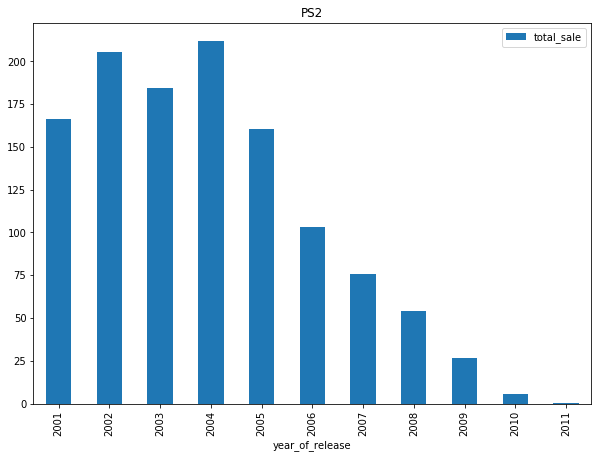

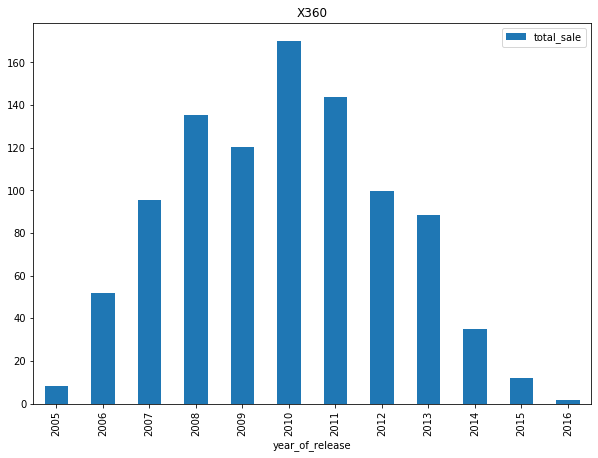

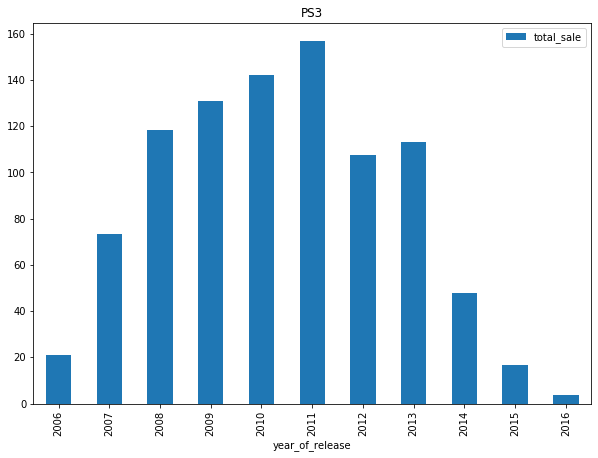

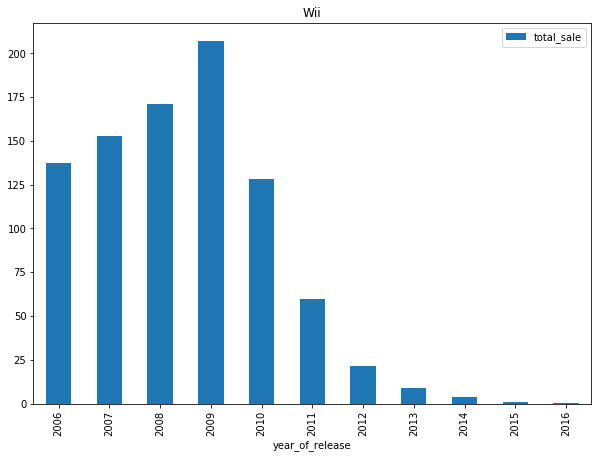

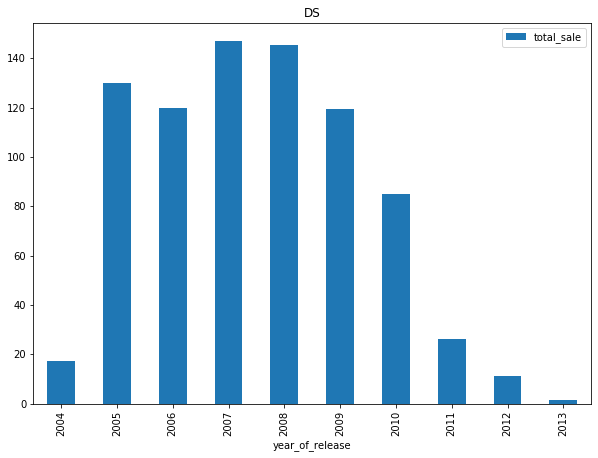

In [12]:
most_popular_platforms = ['PS2', 
                          'X360', 
                          'PS3', 
                          'Wii', 
                          'DS']

for i in most_popular_platforms:
    df_tmp = df_more2001[df_more2001['platform'] == i]
    seles_for_year = df_tmp.pivot_table(index='year_of_release', 
                                        values = 'total_sale', 
                                        aggfunc='sum')
    seles_for_year.plot(y='total_sale', kind='bar', figsize=(10,7))
    plt.title(i)
    plt.show()

Для каждой платформы характерен свой год пика продаж. Например для *PS2* - 2004, а *PS3* - 2011. Однако особенностью этих платформ является то, что для каждой из них наблюдается стремительний упадок продаж к настоящему времени, а значит основывать анализ на этих платформах нерационально. 

### Определение актуального периода

Так как технологии сильно меняются из года в год, рассматривать период с 2001 года не совсем корректно. Будем основываться на данных за последние 2 года - c 2015 до 2016 года включительно. Такие временные рамки позволят не отставать от современных тенденций и сделать анализ и прогноз более достоверным. Прошлые года соответственно учитываться не будут.

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> <s>Ты верно сказала, технологии меняются быстро и рассматривать большой срез данных не совсем корректно. 

Лучше взять меньший срез.  Поясню, почему. Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. 
    
В целом резкий спад платформы может произойти буквально за 3 года. Лидер по продажам за всю историю PS2. Но продажи к 2011 году уже нулевые. X360 был на пике в 2010, но к 2016 упал почти до 0. Нам важно сделать прогноз на 2017 год, поэтому данные для этого должны быть релевантными. Мы видим, что с 2008 по 2012 наблюдалось резкое снижение продаж и релизов, поэтому некоторые платформы уже нежизнеспособны в 2013 и в 2017 соответственно. Нужно рассмотреть период, когда кризис миновал, и тогда у нас будут данные только по тем платформам, которые его пережили. Здесь будет удобно использовать тепловую карту. Так будет очень наглядно.  </s>
    
Отличное решение!    
</div>

In [13]:
working_df = df[df['year_of_release'] >= 2015]

### Выбор потенциально прибыльных платформ

На выбранном диапозоне проведем повторные действия для определения растущих и падающих по продажам платформ.

Для начала определим лидеров продаж за этот период. 

In [14]:
find_leaders = working_df.pivot_table(index='platform', 
                                      values = 'total_sale', 
                                      aggfunc='sum')
find_leaders.sort_values(by='total_sale', ascending = False)

,total_sale
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


Теперь попробуем определить растущие и падающие платформы из этого списка. Для этого создадим функцию, которая будет определять растет или снижается уровень продаж за последние время. 

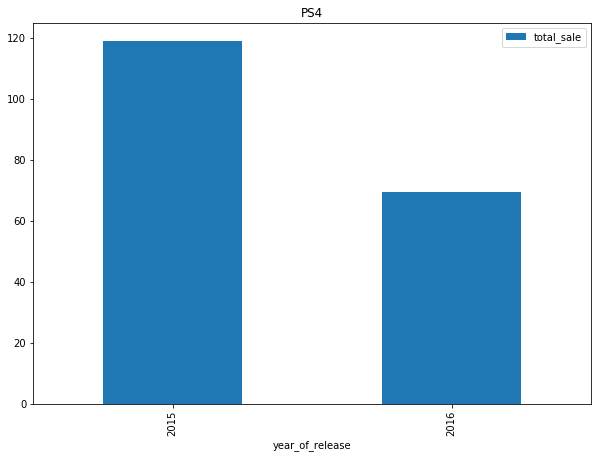

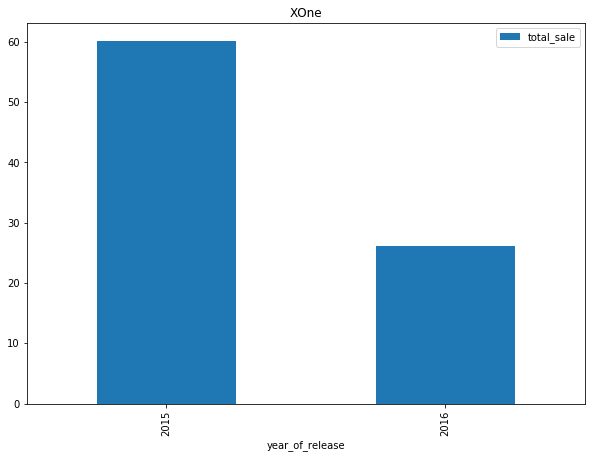

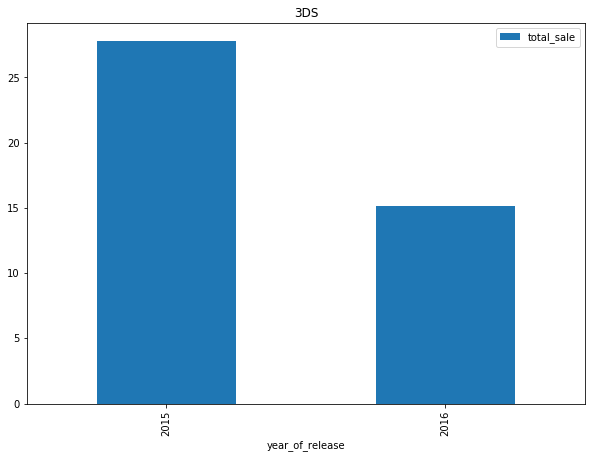

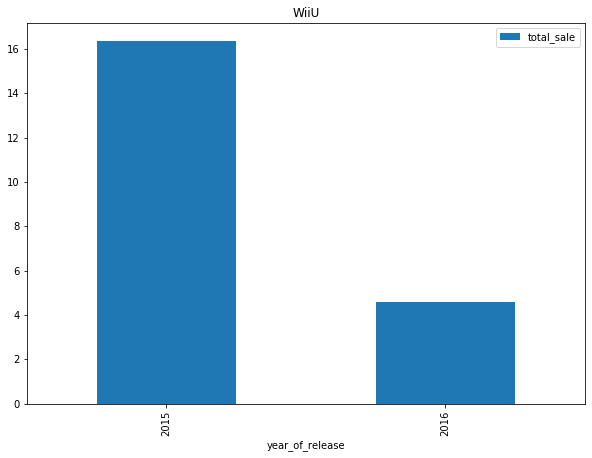

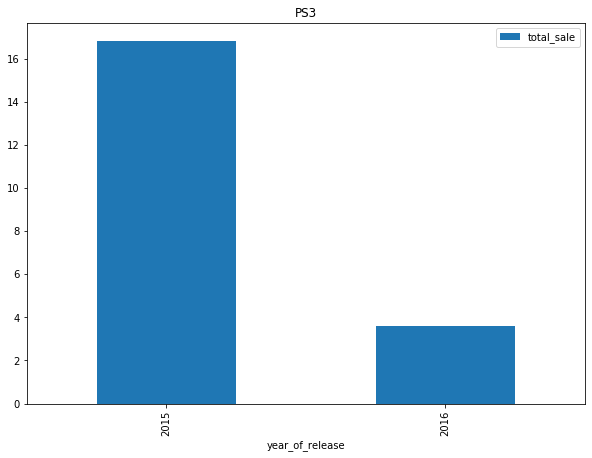

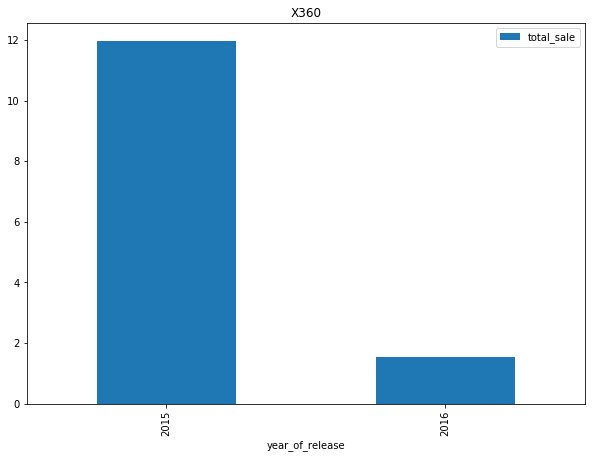

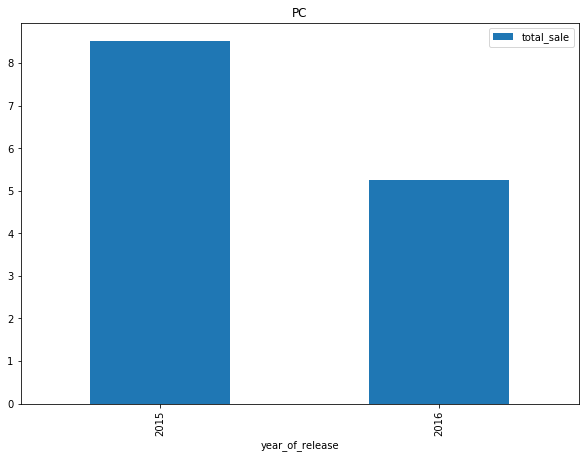

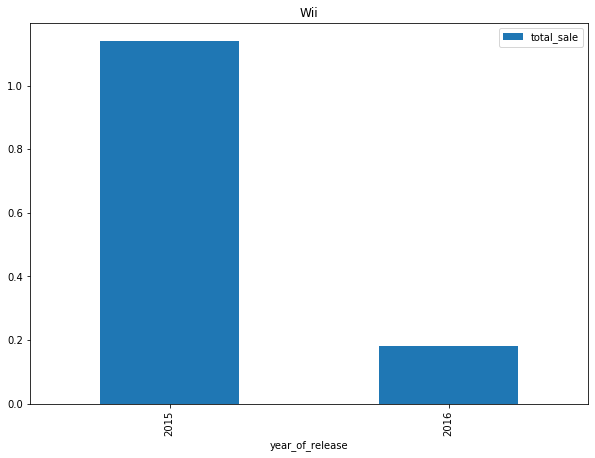

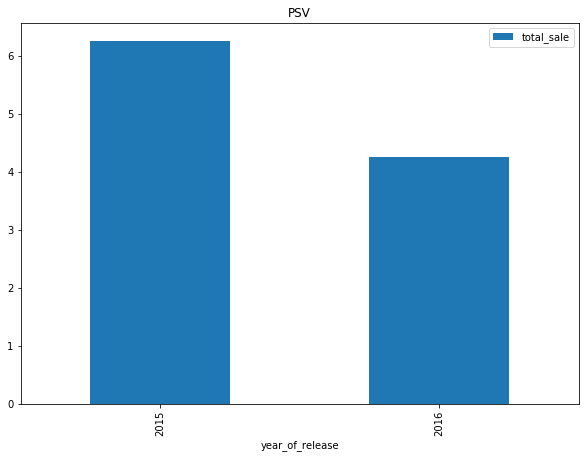

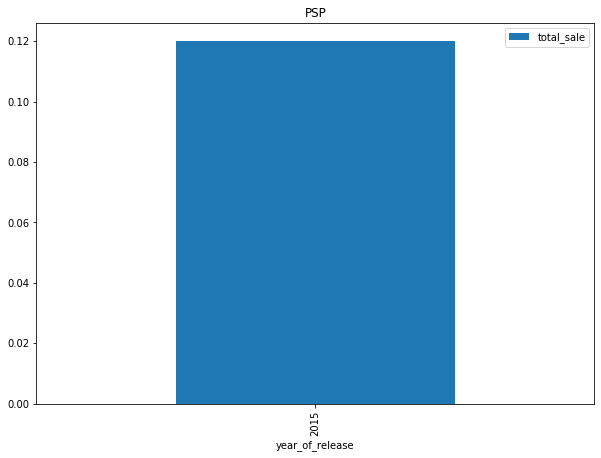

In [15]:
def inc_or_dec(str):
    df_tmp_5 = working_df[working_df['platform'] == str]
    seles_for_year_12_16 = df_tmp_5.pivot_table(index='year_of_release', 
                                                values = 'total_sale', 
                                                aggfunc='sum')
    seles_for_year_12_16.plot(y='total_sale', kind='bar', figsize=(10,7))
    plt.title(i)
    plt.show()
        
for i in working_df['platform'].unique():
    inc_or_dec(i)

На полученых графиках спад наблюдется абсолютно у каждой платформы, однако у 4 платформ он менее критичен: *PS4*, *3DS*, *XOne* и *PC*. Это в какой то степени не особо сочетается со списком лидеров, однако *PS4*, *XOne* и *3DS* оказались в нем и темпы упадка у них не такие быстрые, как у остальных. А значит именно *PS4*, *XOne* и *3DS* можно определить, как потенциально прибыльные платформы. 



<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Молодец, что обосновала свой выбор. </div>

### Глобальные продажи игр в разбивке по платформам

Посмотрим, как распростронены игры внутри потенциально прибыльных поплатформ. 

platform PS4


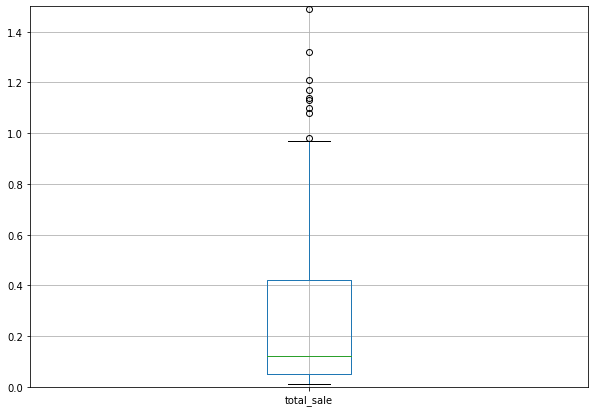

platform XOne


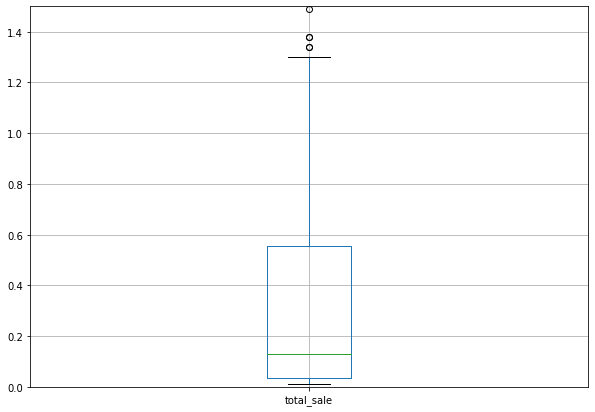

platform 3DS


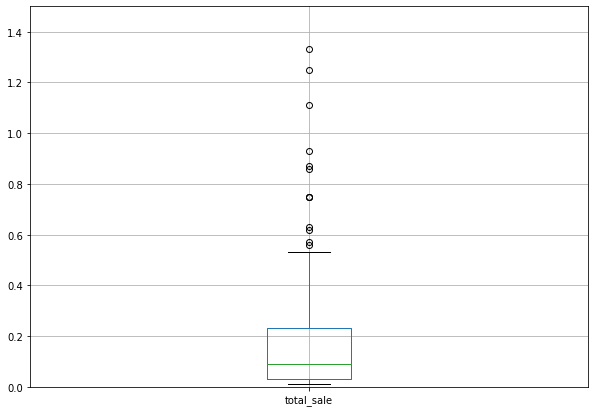

In [16]:
def games(str):
    df_tmp_5 = working_df[working_df['platform'] == str]
    df_tmp_5.boxplot(column='total_sale', figsize=(10,7))
    plt.ylim([0,1.5])
    plt.show()

leaders =['PS4', 
          'XOne',
          '3DS']
for i in leaders:
    print('platform', i)
    games(i)

Полученные данные свидетельствуют о том, что в основном продажи игр по платформам лежат в диапозоне не превышающем один миллион, однако есть и игры, которые приносят колосальный доход, это характерно для каждой платформы. 



<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim. Добавь, пожалуйста. </s></div>

### Влияние отзывов на продажи

Рассмотрим влияние отзывов критиков и пользователей на продажи на примере *PS4*. Для этого сначала создадим таблицу *df_PS4*, которая будет содержать всю информацию только по этой платформе. 

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> <s>В этом пункте нам нужно обязательно исключить из рассмотрения значения -1 (которыми мы заполнили пропуски), так как они сильно исказят результаты. </s></div>

              critic_score  user_score  total_sale
critic_score      1.000000    0.533330    0.392074
user_score        0.533330    1.000000   -0.064368
total_sale        0.392074   -0.064368    1.000000


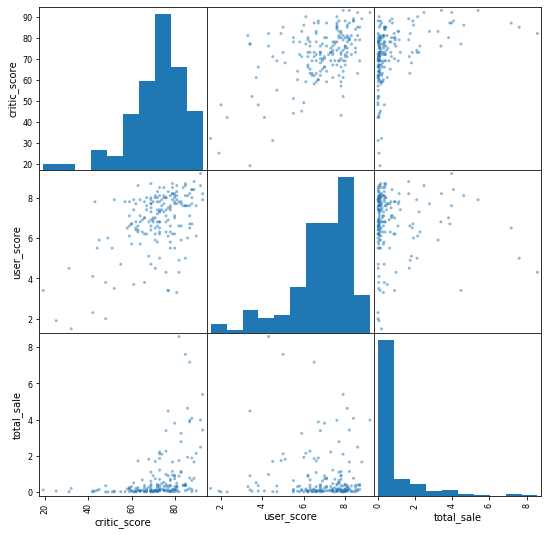

In [17]:
def find_influence(str):
    df_str = working_df[working_df['platform'] == str]
    df_str = df_str.query('critic_score != -1 and user_score != -1')
    drop_columns = ['name', 'year_of_release',
                    'genre', 'na_sales', 
                    'eu_sales', 'jp_sales', 
                    'other_sales', 'rating']
    for i in drop_columns:
        df_str = df_str.drop(i, 1)
    print(df_str.corr())
    pd.plotting.scatter_matrix(df_str, figsize=(9, 9))

find_influence("PS4")

Очень сильно коррелируют столбцы *user_score* и *critic_score*, и действительно, если игра хорошая и интересная, то она нравится как критикам, так и обычным пользователям, а вот на продажи особого влияния они не имеют, хотя определенно связь между ними прямая: с увеличением одного параметра, растет и второй, но незначительно, посмотрим насколько это соответствует платформам *XOne* и *3DS*, чтоб судить о том, насколько это соответствует остальным платформам.

platform XOne
              critic_score  user_score  total_sale
critic_score      1.000000    0.459443    0.422519
user_score        0.459443    1.000000   -0.068684
total_sale        0.422519   -0.068684    1.000000

platform 3DS
              critic_score  user_score  total_sale
critic_score      1.000000    0.791853    0.177575
user_score        0.791853    1.000000    0.240477
total_sale        0.177575    0.240477    1.000000



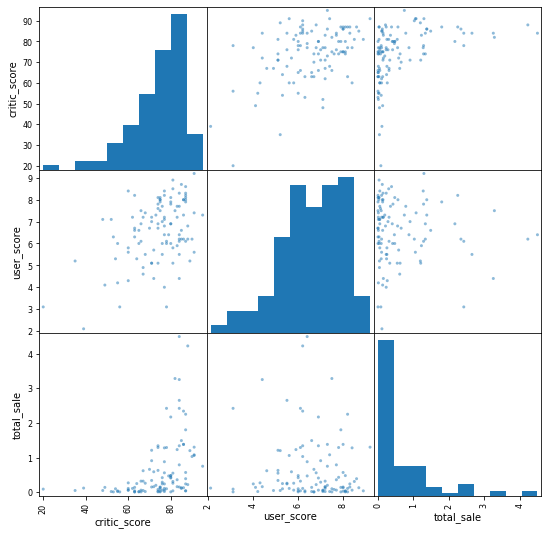

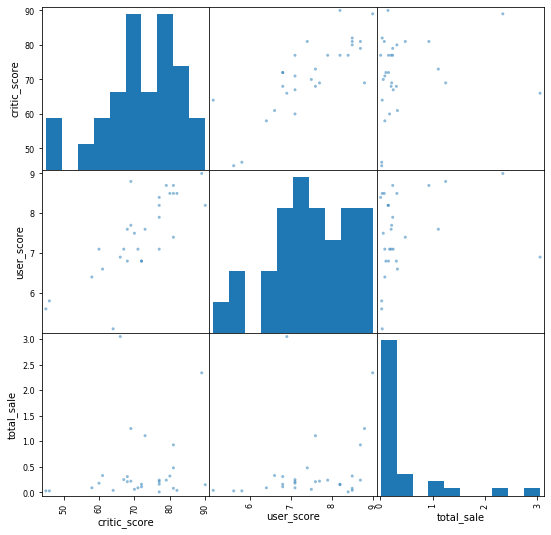

In [18]:
platforms = ['XOne', '3DS']

for i in platforms:
    print('platform', i)
    find_influence(i)
    print('')

Получается, что оценки, действительно не оказывают особого влияния на степень продаж. 

Изучив этот вопрос более детально, было обнаружено, что на самом деле оценка означает не то, насколько игра хороша или плоха, а степень ожидания игроков, например: 10 - большой ажиотаж, 6.5 - мало кому интересна и тд.

### Расперделение жанров 

Посмотрим, как распределяются жанры и выделим среди них наиболее и наименее продаваемые. 

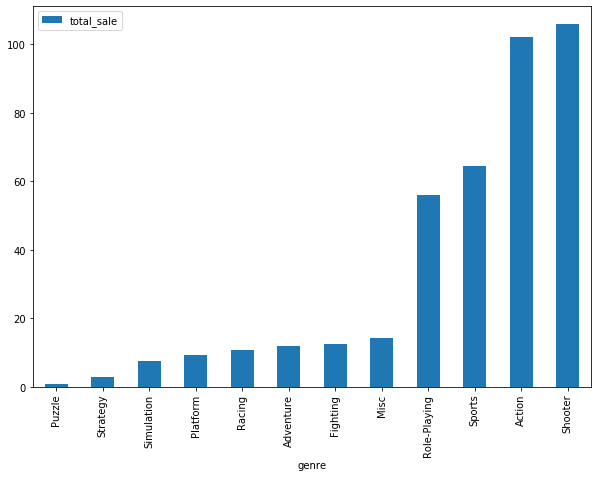

In [19]:
genre_df = working_df.pivot_table(index='genre', 
                                  values='total_sale',
                                  aggfunc='sum')
genre_df = genre_df.sort_values(by ='total_sale')
genre_df.plot(y='total_sale', kind='bar', figsize=(10,7))

Самыми продаваемыми жанрами оказались: *Action*, *Shooter*, *Role-Playing* и *Sports*, наименее продаваемые: *Puzzle* и *Strategy*, однако стоит соотнести такое распределение с количеством игр соответствующего жанра, может их просто сильно больше, от чего и получается такое распределение. 

In [20]:
genre_count_df = working_df.groupby('genre')['name'].count()
genre_count_df = genre_count_df.sort_values(ascending=False)
genre_count_df

genre
Action          431
Role-Playing    132
Adventure       110
Sports          107
Shooter          81
Misc             71
Racing           42
Fighting         37
Simulation       33
Strategy         29
Platform         28
Puzzle            7
Name: name, dtype: int64

Действительно, игр жанра action больше почти в три раза по сравнению со следующим идущем жанром, поэтому и продажи наибольшие, жанр puzzle имеет наименьшее число продаж, но и игр меньше всего, что очень логично, однако игр жанра shooter не так уж и много, а по продажам они занимают второе место.

Для более точной оценки посмотрим еще на медианные продажи по каждому жанру

In [21]:
for i in working_df['genre'].unique():
    genre_query =  working_df[working_df['genre'] == i]
    genre_median = genre_query['total_sale'].median()
    print(i, genre_median)

Shooter 0.38
Sports 0.12
Role-Playing 0.11499999999999999
Action 0.060000000000000005
Platform 0.09999999999999999
Simulation 0.09999999999999999
Fighting 0.09
Racing 0.05500000000000001
Adventure 0.03
Misc 0.06
Strategy 0.05
Puzzle 0.03


В целом медианные продажи не опровергли полученных ранее результатов. 

**Вывод:**

По итогу проведения исследовательского анализа были выявлены лидеры продаж среди платформ и жанров игр, определены временные рамки наиболее интересного периода для проведения анализа, но что самое главное - выделены потенциально прибыльные платформы. 

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> <s>Хорошо, что ты обратила внимание, что суммарные продажи это довольно грубая оценка. Здесь можно еще рассмотреть средние /  медианные продажи. Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. </s>

👍
</div>

## Составление портрета пользователя отдельно каждого региона

Рассмотрим теперь отдельно каждый регион и выделим топ5 лидирующих позиций по каждому параметру: платформа, жанр и возрастной рейтинг. 

In [22]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
criterion = ['platform', 'genre', 'rating']

def top5_platforms(str):
    for i in criterion:
        region_df = working_df.pivot_table(index=i, 
                                           values=str,
                                           aggfunc='sum')
        region_df = region_df.sort_values(by=str, ascending=False)
        print(region_df)

for i in regions:
    top5_platforms(i)

          na_sales
platform          
PS4          63.86
XOne         50.30
3DS          10.31
WiiU          8.86
X360          8.05
PS3           5.66
PC            3.72
PSV           0.54
Wii           0.49
PSP           0.00
              na_sales
genre                 
Shooter          48.18
Action           33.68
Sports           26.31
Role-Playing     19.82
Misc              5.58
Fighting          5.54
Adventure         3.84
Platform          3.78
Racing            2.82
Simulation        1.36
Strategy          0.82
Puzzle            0.06
         na_sales
rating           
M           47.03
Unknown     37.44
E           26.59
T           22.86
E10+        17.87
          eu_sales
platform          
PS4          83.54
XOne         28.10
PC            9.10
3DS           7.39
PS3           7.30
WiiU          6.49
X360          4.21
PSV           1.08
Wii           0.73
PSP           0.00
              eu_sales
genre                 
Shooter          40.28
Action           34.82
Spor

Именно столько было совершено продаж по каждому из критериев, исходя из чего можно выделить топ5 лидеров для каждого региона по разным критериям. 

*Америка:*

Топ5 по платформам:

* PS4
* XOne
* 3DS
* WiiU
* X360  

В общей сложности именно эти платформы и составляют определяющее большинтво продаж, занимая колоссальную долю среди всех имеющихся. 

Топ5 по жанрам:

* Shooter
* Action
* Sports
* Role-Playing 
* Misc

Action и Shooter имеют тут наибольшую долю продаж, что говорит о грандизной популярности этих жанров в Америке. 

Что касается возрастных ограничений, то лидером здесь являются игры для детей старше 17 лет. 


*Европа:*

Топ5 по платформам:

* PS4
* XOne
* PC
* 3DS
* PS3  

Наибольшее предпочтение люди в этом регионе отдают PS4 и XOne. 

Топ5 по жанрам:

* Shooter
* Action
* Sports
* Role-Playing
* Racing 

Рейтинг идентичен американскому, однако пятую позицию занимает жанр *racing*, наверное, это связано с тем, что именно в этом регионе гонки занимают не последнее место среди интересов населения, как минимум именно в Европе проводится Формула 1 (в Монако), и именно Европа является главным производителем и создателем гоночных автомобилей. 

В Европе также как и в Америке отдают предпочтение играм с возратсным рейтингом либо для всех, либо 17+

*Япония:*

Топ5 по платформам:

* 3DS
* PS4
* PSV
* PS3
* WiiU 

В целом картина не сильно отличается от Европы и Америки, но есть и что то новое в этом топе. 

Топ5 по жанрам:

* Action
* Role-Playing
* Shooter
* Misc
* Adventure

Как и в случае с платформами, конечно, есть схожие направления с Европой и Америкой, однако встречаются и новые, например, Adventure

Что касается возрастных ограниченй:  наибольшое количество из них неизвестно, однако следующим типом идет маркировка для тинейджеров. 

**Вывод:**

Портреты Америки и Европы очень похожи, а вот Япония от них отличается, но не сильно. 

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Здесь было бы здорово еще построить графики. Например, очень подошла бы круговая диаграмма. </div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2:</b> Нужно еще отметить, что в Японии самый популярный рейтинг это Unknown. Можно подумать, с чем это может быть связано. </div>

## Проверка гипотез

### Гипотеза о равенстве средних пользовательских оценках

Проверим на сколько верно предположение, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ *Xbox One* и *PC* разные

Значение *alpha* возьмем равным 0.05

А также посмотрим на распределение значений на графике. 

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Гипотезы сформулированы верно.</div>

использовать equal_val = False


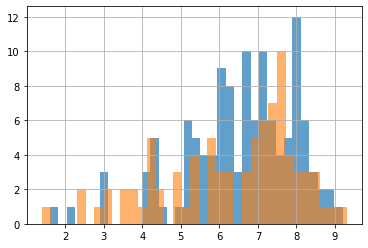

In [23]:
XOne_df = working_df.query('platform == "XOne" and user_score != -1')
PC_df = working_df.query('platform == "PC" and user_score != -1')

def find_var(samp1, samp2):
    var_1 = np.var(samp1)
    var_2 = np.var(samp2)
    if (var_1 == var_2) :
        print('использовать equal_val = True')
    else:
        print('использовать equal_val = False')
    samp1.hist(bins=35, alpha = 0.7)
    samp2.hist(bins=35, alpha = 0.6)
       
find_var(XOne_df['user_score'], PC_df['user_score'])

Распределение стремится к нормальному, однако все же для проверки гипотез будем использовать t-распределение Стъюдента.

In [24]:
results = st.ttest_ind(XOne_df['user_score'], PC_df['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.2946308864003345


Полученное значение не дает оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

###  Проверка гипотезы об отличии пользовательских рейтингов жанров Action и Sports

Нулевая гипотеза: пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: пользовательские рейтинги жанров Action и Sports разные

Значение *alpha* возьмем равным 0.05

использовать equal_val = False


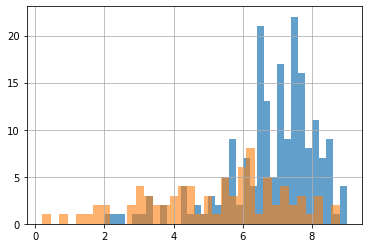

In [25]:
action_df = working_df.query('genre == "Action" and user_score != -1')
sports_df = working_df.query('genre == "Sports" and user_score != -1')

find_var(action_df['user_score'], sports_df['user_score'])

Распределение стремится к нормальному, однако все же для проверки гипотез будем использовать t-распределение Стъюдента.

In [26]:
results = st.ttest_ind(action_df['user_score'], sports_df['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  5.97163549920592e-10


<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Здорово, что изучила распределения. Тестирование гипотез выполнено верно. Также, молодец, что исключила значения -1 из рассмотрения. </div>

Полученное значение дает достаточные основания отвернуть нулевую гипотезу, приняв то, что пользовательские рейтинги жанров Action и Sports разные  

## Общий вывод

Проведенный анализ показал, что для того, чтоб выбрать перспективный продукт, надо в первую очередь основываться на том, в каком регионе будут проводиться продажи, ведь, исходя из полученных результатов, рынок Японии сильно отличается от Американского и Европейского рынков, которые сами по себе сильно похожи друг на друга. 

Однако лидером в установленный актуальный период (2012-2016) является PlayStation абсолютно в каждом регионе, вместе с которым лидирующие позиции занимает жанр Action - вместе они и представляют собой наиболее перспективные и потенциально популярные продукты. 

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Отлично, что ест общий вывод. На будущее - в выводе можно еще кратко приводить описание данных, с которыми работали, проблемы в данных, которые обнаружили, давать свои рекомендации по сбору данных и тд. </div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Елизавета, у тебя получилась очень сильная работа. Хочется отметить большое количество автоматизации вычислений!

Есть пара критичных и несколько некритичных замечаний.
    
Критично исправить:
    
- поправить заполнение пропусков в столбце рейтинг
- построить ящики с усами без выбросов
- поправить пункт Влияние отзывов на продажи
    
И было бы здорово исправить несколько некритичных (желтых) замечаний, чтобы их осталось не больше двух.
    
Буду ждать исправленный вариант! 
</div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2:</b> Замечания исправлены. Проект принят! Удачи в следующих проектах!
</div>

## Чек-лист

- [x] описаны выявленные в данных проблемы
- [x] подготовлен датасет к анализу
- [x] графики для распределений построены и объяснены
- [x] рассчитана дисперсия
- [x] сформулированна альтернативная и нулевая гипотезы
- [x] применены методы для их проверки
- [x] объяснены результат проверки гипотез
- [x] соблюдена структура проекта и поддерживается аккуратность кода
- [x] делаются выводы 
- [x] оставляются комментарии к шагам